# Assignment 2 - Machine Learning Basics

## *Jake Bova*
Netid:  *jb240893*

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [ ]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. Better. With a large sample size, the flexible method will be able to fit the data more closely, and the variance will be lower.

2. Worse. With a small sample size, the flexible method will overfit the data, and the variance will be higher.

3. Better. A flexible method will be able to fit the non-linear relationship more closely, and the variance will be lower.

4. Worse. A flexible method will overfit the data, and the variance will be higher.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

a) (i) Regression (ii) Inference (iii) n = 500, p = 3

b) (i) Classification (ii) Prediction (iii) n = 20, p = 13

c) (i) Regression (ii) Prediction (iii) n = 52, p = 3

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [ ]:
import numpy as np

X_train = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y_train = np.array(['r','r','r','b','b','r'])

**ANSWER**:

In [ ]:
from scipy.spatial import distance
import pandas as pd
distances = []
for i in range(len(X_train)):
    distances.append(distance.euclidean(X_train[i], [0,0,0]))

df_results = pd.DataFrame({'Observation': [1,2,3,4,5,6], 'Distance': distances})
df_results

**b)** Our prediction with $K=1$ is blue, because the nearest neighbor is observation 5, which is blue.

**c)** Our prediction with $K=3$ is red, because the three nearest neighbors are observations 2, 5, and 6, which give 2r and 1b

**d)** We would expect the best value of $K$ to be small, because a small value of $K$ will be more flexible and will be able to fit the non-linear boundary more closely.  If we used a high $K$ value, the boundary would be more smooth / linear

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [ ]:
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x_train = None
        self.y_train = None
        self.k = None
        
    def fit(self, x, y, k):
        # Save the training data to properties of this class
        self.x_train = x # features
        self.y_train = y # targets / labels
        self.k = k # number of neighbors to use
        
    def predict(self, x):
        y_hat = [] # Variable to store the estimated class label for each observation in x
        # Calculate the distance from each vector in x to the training data
        for x_test in x:
            distances = [] # each x_test will have its own list of distances
            for x_train in self.x_train:
                distances.append(distance.euclidean(x_test, x_train)) 
            
            # identify the k nearest neighbors
            k_neighbor_indices = np.argsort(distances)[:self.k] # argsort returns the indices that would sort an array, slice to get the k smallest
            # print('k_neighbor_indices: ', k_neighbor_indices)

            # identify the class of each neighbor
            k_neighbor_classes = [self.y_train[i] for i in k_neighbor_indices] # use the indices to get the classes from the training data
            # print('k_neighbor_classes: ', k_neighbor_classes)

            # identify the most common class among the neighbors
            y_hat.append(max(set(k_neighbor_classes), key=k_neighbor_classes.count)) # count the number of times each class appears, return the most common

        # return the estimated targets
        # print('y_hat: ', y_hat)
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [ ]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each

# low-dimensional dataset
X_train = np.array([[ 0, 3, 0],
                [ 2, 0, 0],
                [ 0, 1, 3],
                [ 0, 1, 2],
                [-1, 0, 1],
                [ 1, 1, 1]])
y_train = np.array(['r','r','r','b','b','r'])

# high-dimensional dataset
Xhigh = np.random.rand(1000, 100)
yhigh = np.random.randint(0, 2, 1000)

# split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(Xhigh, yhigh)

# function to time predictions of a model on a dataset
import time
import pandas as pd
def time_custom_knn(X_train, X_test, y_train, y_test, k):
    knn = Knn()
    knn.fit(X_train, y_train, k)
    start_time = time.time()
    y_pred = knn.predict(X_test)
    end_time = time.time()
    elapsed_time = end_time - start_time
    accuracy_score = accuracy(y_test, y_pred)
    output = pd.DataFrame({'k': [k], 'accuracy': [accuracy_score], 'time': [elapsed_time]})
    return output

# time the predictions of the low-dimensional dataset
time_custom_knn(X_train, X_test, y_train, y_test, 5)

# time the predictions of the high-dimensional dataset
# time_custom_knn(X_train_high, X_test_high, y_train_high, y_test_high, 5)

# # # predict the point 0,0,0 (to compare with Q3)
# ypred = knn.predict([[0,0,0]])
# print('ypred: ', ypred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def time_scikit_knn(X_train, y_train, X_test, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    startime = time.time()
    y_pred = knn.predict(X_test)
    endtime = time.time()
    runtime = endtime - startime
    accuracy = accuracy_score(y_test, y_pred)
    output = pd.DataFrame({'k': [k], 'accuracy': [accuracy], 'time': [runtime]})
    return output

# time predictions of the low-dimensional dataset
time_scikit_knn(X_train, y_train, X_test, y_test, 5)

# time predictions of the high-dimensional dataset
# time_scikit_knn(X_train_high, y_train_high, X_test_high, y_test_high, 5)

**d)** My implementation has a similar accuracy to the scikit learn implementation, but is much slower.  The scikit learn implementation is faster because it is written largely in Cython, which is a compiled language that is much faster than Python.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [546]:
# a)
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# dataset with 1000 samples, noise = 0.35
X_train, y_train = make_moons(n_samples=1000, noise=0.35)

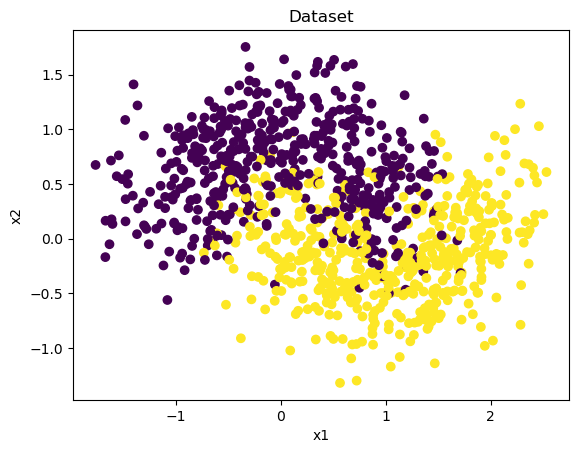

In [547]:
# b)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title('Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [548]:
# function to create a random subset of a dataset
def random_subset(X, y, n):
    # create a list of random indices
    indices = np.random.randint(0, len(X), n)
    # use the indices to get the random subset
    X_subset = X[indices]
    y_subset = y[indices]
    return X_subset, y_subset

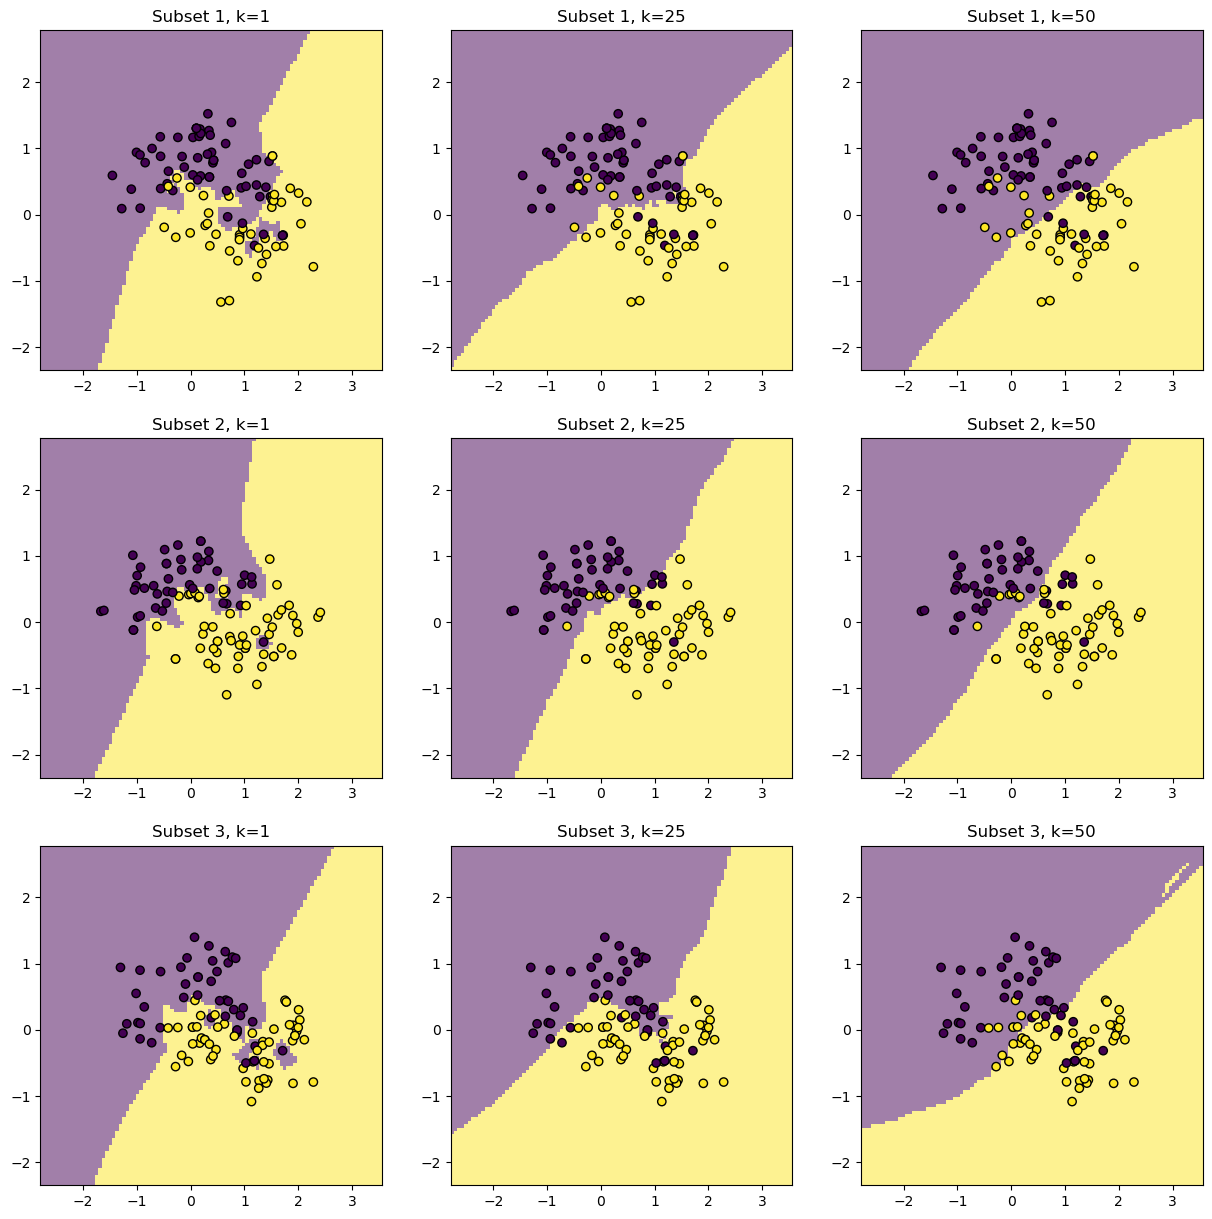

In [549]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

datasets = [random_subset(X_train, y_train, 100) for _ in range(3)]
ks = [1, 25, 50]

# 3x3 grid of plots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# THE BELOW EXAMPLE IS TAKEN FROM https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

for i, (X_subset, y_subset) in enumerate(datasets):
    for j, k in enumerate(ks):
        ax = axs[i, j]

        # train the model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_subset, y_subset)

        # Plot the decision boundary
        disp = DecisionBoundaryDisplay.from_estimator(
            knn,
            X_train,
            response_method="predict",
            plot_method="pcolormesh",
            ax=ax,
            alpha=0.5,
            shading='auto'
        )

        # Scatter plot of the data points
        scatter = ax.scatter(X_subset[:, 0], X_subset[:, 1], c=y_subset, edgecolors="k")
        ax.set_title(f"Subset {i+1}, k={k}")

plt.show()

**e)** The decision boundaries that best separate the two classes of data are probably the ones with $k=1$, although I would probably prefer a value between 1 and 25 here.  The decision boundaries that vary the most as the data change are the ones with $k=1$, because they are the most flexible.

**f)** The bias-variance tradeoff is the tradeoff between flexibility and variance.  A flexible model will have low bias, but high variance, and a less flexible model will have high bias, but low variance.  In the above plots, the $k=1$ model is the most flexible, and the $k=50$ model is the least flexible.  The $k=1$ model has low bias, but high variance, and the $k=50$ model has high bias, but low variance.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [550]:
# a)
X_test, y_test = make_moons(n_samples=1000, noise=0.35)

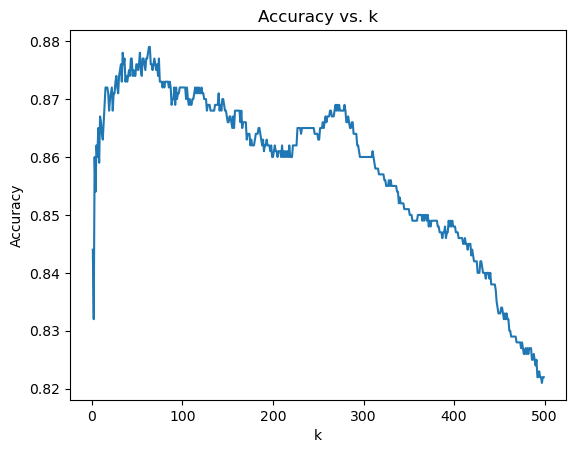

In [553]:
# b)
fits = []
for k in range(1, 500):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    fits.append(knn.score(X_test, y_test))

plt.plot(range(1, 500), fits)
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**